In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [8]:
from ipywidgets import interact

ImportError: cannot import name 'Mapping' from 'collections' (C:\Users\Administrator\anaconda3\Lib\collections\__init__.py)

In [3]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,MeanShift,SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
!pip install yellowbrick

In [5]:
from yellowbrick.cluster import KElbowVisualizer
from ExKMC.Tree import Tree

from IPython.display import Image,display
from ipywidgets import interact
import os

ModuleNotFoundError: No module named 'ExKMC'

In [7]:
samsung_train_path = './Downloads/samsung_train.txt'
samsung_train_labels_path='./Downloads/samsung_train_labels.txt'
samsung_test_path='./Downloads/samsung_test.txt'
samsung_test_labels_path='./Downloads/samsung_test_labels.txt'

In [8]:
X_train = np.loadtxt(samsung_train_path)
y_train = np.loadtxt(samsung_train_labels_path).astype(int)

X_test = np.loadtxt(samsung_test_path)
y_test = np.loadtxt(samsung_test_labels_path).astype(int)

In [9]:
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [10]:
X=np.vstack((X_train,X_test))
print(X.shape)

(10299, 561)


In [11]:
print(y_train.shape)
print(y_test.shape)

(7352,)
(2947,)


In [12]:
y = np.concatenate((y_train, y_test))

In [13]:
n_classes=np.unique(y)

In [14]:
print(n_classes)

[1 2 3 4 5 6]


In [15]:
activities = [
    "walking",
    "going up the stairs",
    "going down the stairs",
    "sitting",
    "standing",
    "lying down"
]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
print(X_scaled.shape)

(10299, 561)


In [18]:
pca=PCA(n_components=0.9,random_state=17)
X_pca =pca.fit_transform(X_scaled)
print(X_pca.shape)


(10299, 65)


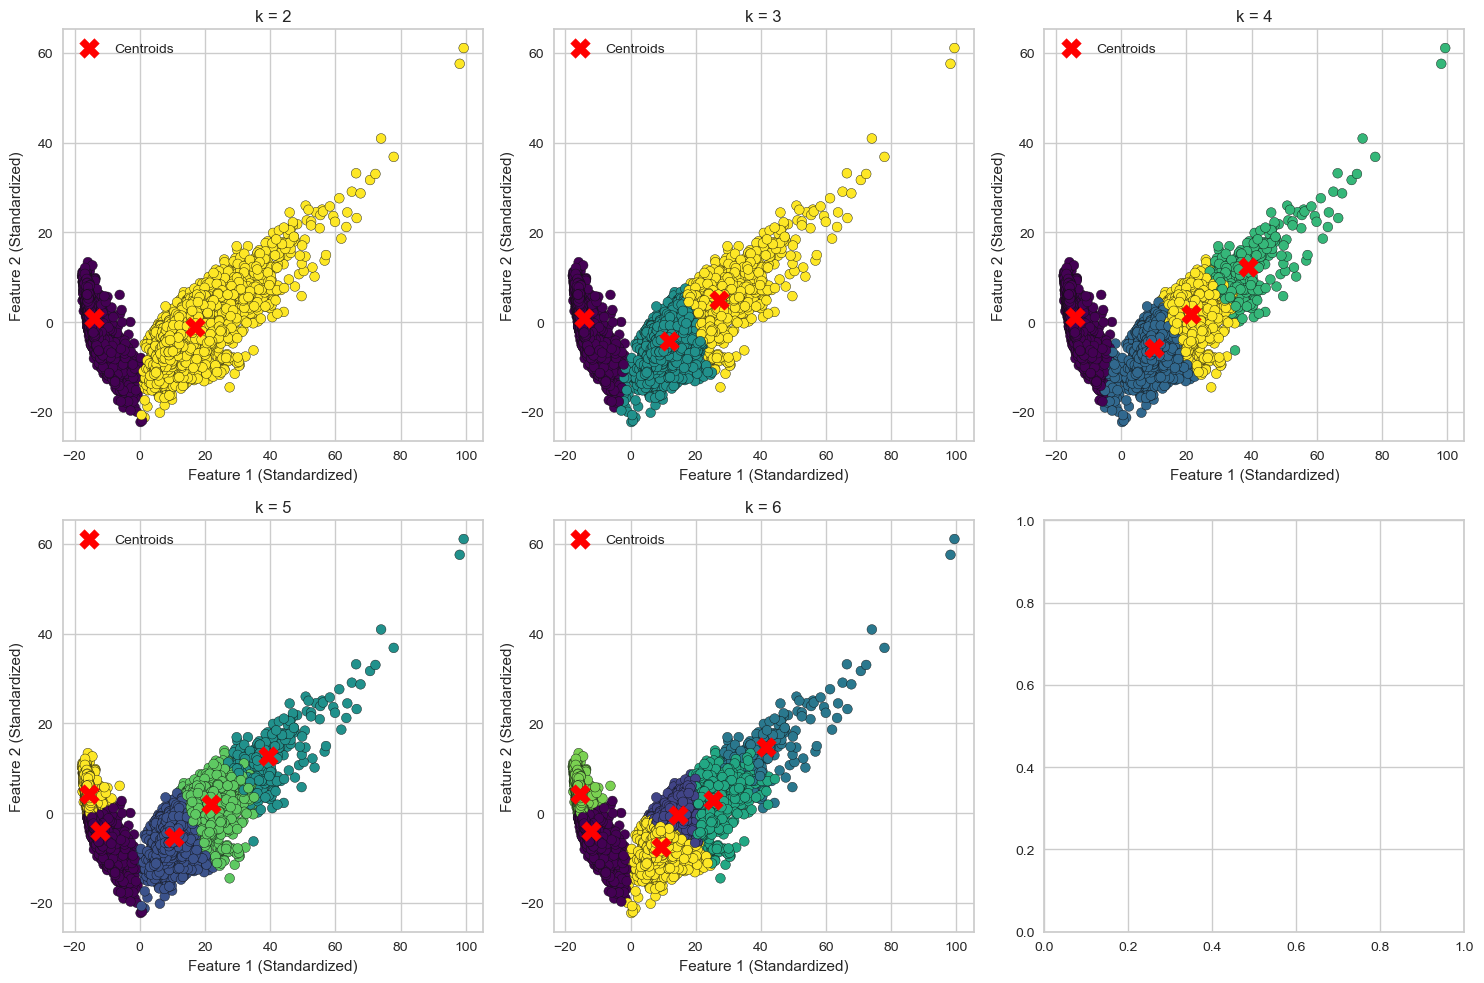

In [19]:
fig,axes= plt.subplots( 2,3,figsize=(15, 10))
axes = axes.ravel()

for i, num_clusters in enumerate(range(2, 7)):# i starts from 0 num_clusters starts from 2
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca) #kmeans_labels = [0, 1, 2, 1, 0]


    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k') #for points
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids') # for centroids
    axes[i].set_title(f'k = {num_clusters}')
    axes[i].set_xlabel('Feature 1 (Standardized)')
    axes[i].set_ylabel('Feature 2 (Standardized)')
    axes[i].legend()

plt.tight_layout()
plt.show()


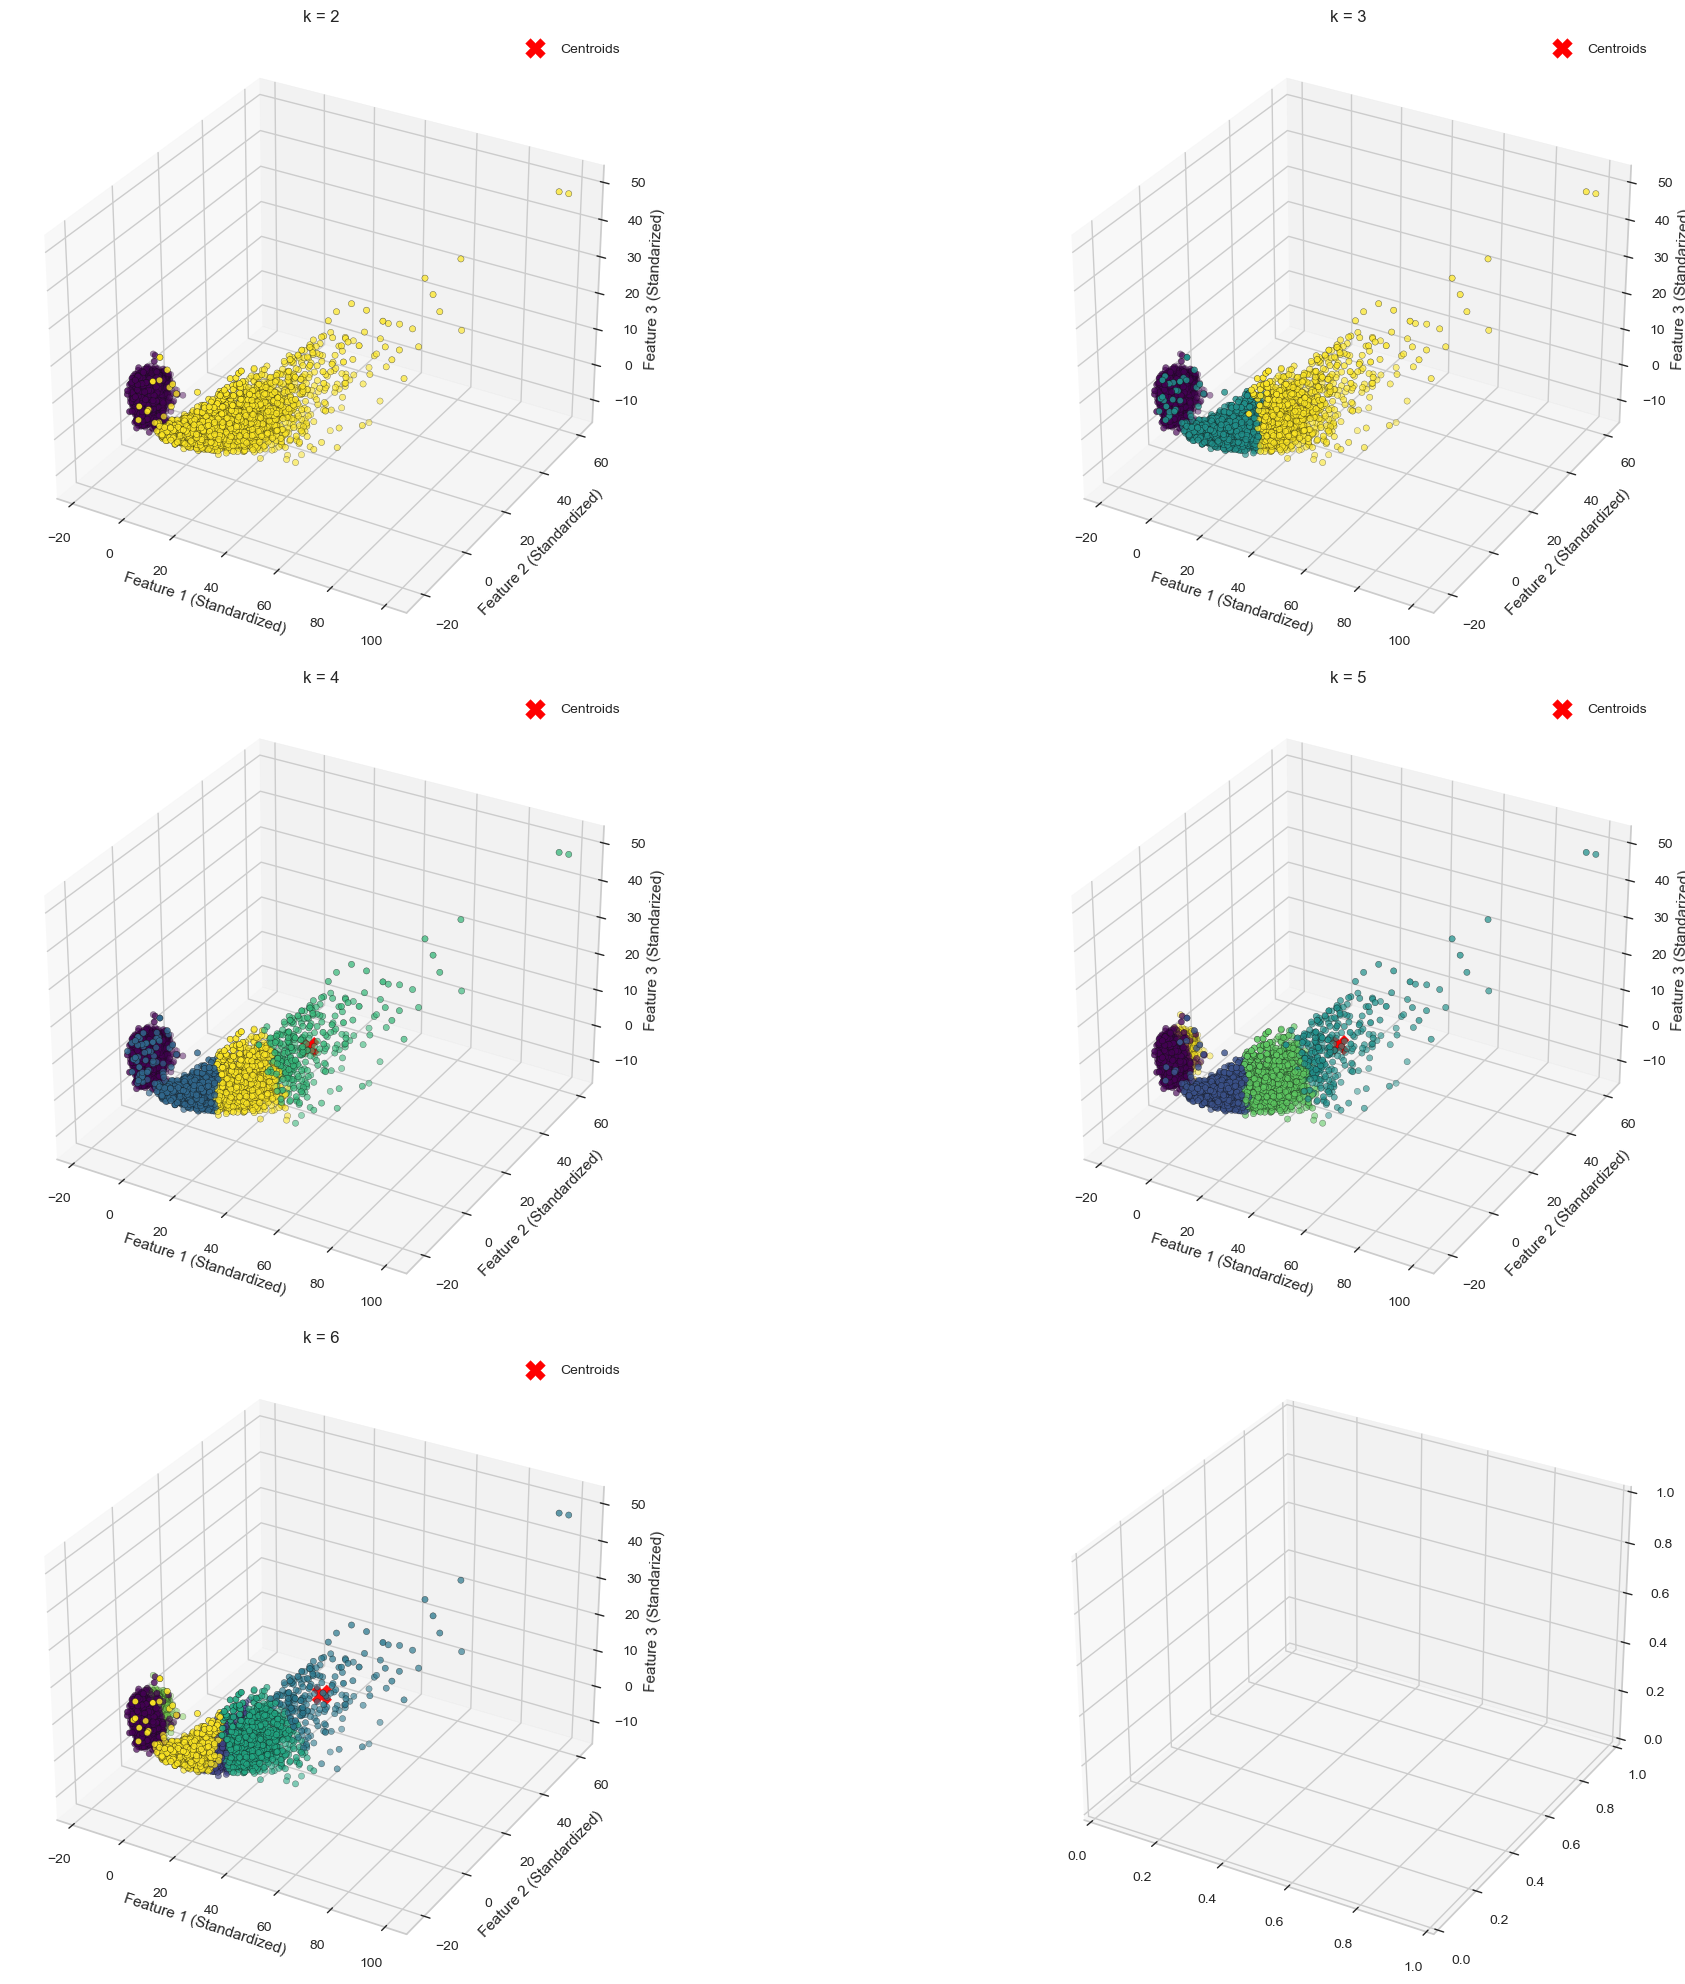

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig, axes = plt.subplots(3, 2, figsize=(25, 20), subplot_kw={'projection': '3d'})
axes = axes.ravel()

for i, num_clusters in enumerate(range(2, 7)):# i starts from 0 num_clusters starts from 2
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca) #kmeans_labels = [0, 1, 2, 1, 0]


    axes[i].scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:,2], c=kmeans_labels, cmap='viridis', edgecolors='k') #for points
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:,2], s=200, c='red', marker='X', label='Centroids') # for centroids
    axes[i].set_title(f'k = {num_clusters}')
    axes[i].set_xlabel('Feature 1 (Standardized)')
    axes[i].set_ylabel('Feature 2 (Standardized)')
    axes[i].set_zlabel('Feature 3 (Standarized)')
    axes[i].legend()

plt.tight_layout()
plt.show()

Elbow Method to determine the number of clusters to be formed:


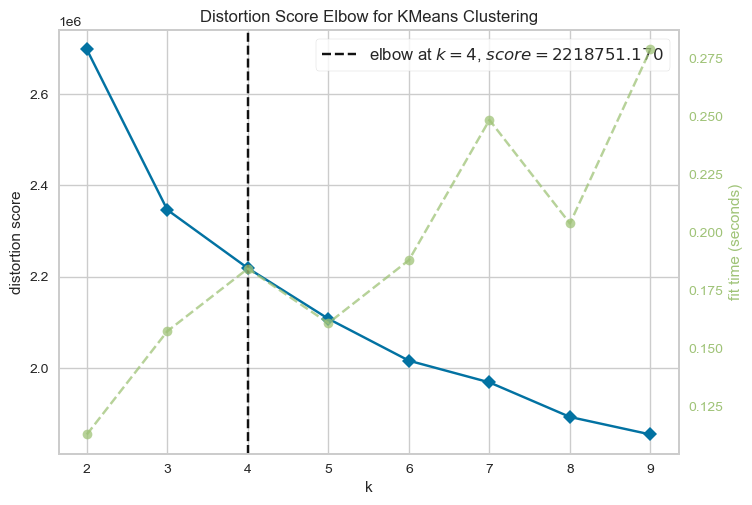

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=(2, 10))
Elbow_M.fit(X_pca)
Elbow_M.show()

In [6]:

def explainable_KMC(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    tree = Tree(k=num_clusters)
    tree.fit(X_pca, kmeans)
    tree.plot(filename="test", feature_names=activities)
    display(Image(filename='test.gv.png'))
    os.remove("test.gv.png")
    os.remove("test.gv")

interact(explainable_KMC,num_clusters=(2,6,1))

NameError: name 'interact' is not defined

In [ ]:
!pip uninstall ipywidgets
!pip install ipywidgets

In [ ]:
!jupyter nbextension enable --py widgetsnbextension